In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

In [86]:
def plot_configuration(spins):
    '''
    
    this is just a helper function to plot the configuration of spins  given by 'spins'
    
    '''
    N = np.shape(spins)[1]
    fig, ax = plt.subplots()
    fig.add_axes()
    ax = fig.axes[0]
    for i in range(N):
        ax.plot([i, i], [0,N-1], 'k')
        ax.plot([0,N-1], [i,i], 'k')

    colors = ['b', 'gold'] # note: blue is down, gold is up!
    for i in range(N):
        for j in range(N):
            fig.gca().add_patch(plt.Circle((i,j), radius=0.35, fc=colors[int((spins[i,j]+1)/2.)]))
   
    ax.set_ylim(-1,N+1)
    ax.set_xlim(-1,N+1)
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('off')
    plt.savefig('ising.png')
    fig.show()

In [87]:
#Load configurations data
N=30
configs = np.loadtxt("configs_30x30.txt")
labels = np.loadtxt("labels_30x30.txt")
print("loaded %i training configurations of size %ix%i for training"%(len(configs), N,N))

loaded 10000 training configurations of size 30x30 for training


In [112]:
test_x = np.array(np.loadtxt("test_configs_30x30.txt"))
test_label = np.array(np.loadtxt("test_labels_30x30.txt"))
print("loaded %i test configurations of size %ix%i for training"%(len(configs), N,N))

loaded 10000 test configurations of size 30x30 for training


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


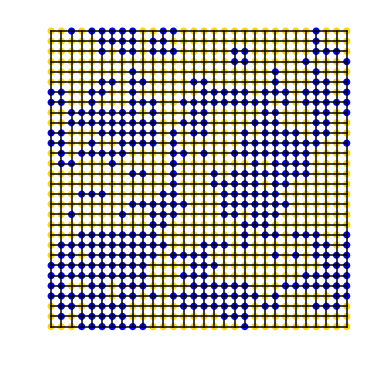

In [88]:
plot_configuration(np.reshape(np.array(configs[45]), (N,N)))

In [107]:
#Prepare data for training
#Exclude temperature close to transition
T_low = 2.
T_high = 2.5
x = []
y = []
for i, label in enumerate(labels):
    if label < T_low:
        x.append(configs[i])
        y.append((1,0))
    if label > T_high:
        x.append(configs[i])
        y.append((0, 1))
x = np.array(x)
y = np.array(y)

In [130]:
#Construct the network
model=Sequential()
model.add(Dense(100,input_dim=N*N,activation='sigmoid',kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01))) #Hidden layer
model.add(Dense(2,activation='softmax',kernel_initializer='random_normal')) #Output layer

In [131]:
#Compile the network
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
#Train the network
a=model.fit(x,y,epochs=100,batch_size=32,validation_split=0.1)

Train on 6750 samples, validate on 750 samples
Epoch 1/100
6750/6750 [==============================] - 1s 218us/step - loss: 1.1249 - acc: 0.6101 - val_loss: 0.6984 - val_acc: 0.6293
Epoch 2/100
6750/6750 [==============================] - 1s 151us/step - loss: 0.5789 - acc: 0.8467 - val_loss: 0.5067 - val_acc: 0.8627
Epoch 3/100
6750/6750 [==============================] - 1s 169us/step - loss: 0.3386 - acc: 0.9627 - val_loss: 0.2452 - val_acc: 0.9787
Epoch 4/100
6750/6750 [==============================] - 1s 163us/step - loss: 0.1590 - acc: 0.9948 - val_loss: 0.1102 - val_acc: 1.0000
Epoch 5/100
6750/6750 [==============================] - 1s 166us/step - loss: 0.0839 - acc: 0.9982 - val_loss: 0.0631 - val_acc: 1.0000
Epoch 6/100
6750/6750 [==============================] - 1s 186us/step - loss: 0.0552 - acc: 0.9987 - val_loss: 0.0440 - val_acc: 1.0000
Epoch 7/100
6750/6750 [==============================] - 1s 170us/step - loss: 0.0415 - acc: 0.9993 - val_loss: 0.0335 - val_acc: 1

Epoch 60/100
6750/6750 [==============================] - 1s 146us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 61/100
6750/6750 [==============================] - 1s 184us/step - loss: 0.0404 - acc: 0.9981 - val_loss: 0.0363 - val_acc: 1.0000
Epoch 62/100
6750/6750 [==============================] - 1s 173us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 63/100
6750/6750 [==============================] - 1s 153us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 64/100
6750/6750 [==============================] - 1s 144us/step - loss: 0.0051 - acc: 0.9997 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 65/100
6750/6750 [==============================] - 1s 151us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 66/100
6750/6750 [==============================] - 2s 225us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 67/100
6750/6750 [==========

In [133]:
prediction=model.predict(test_x)

In [134]:
Temps = list(np.sort(list(set(test_label))))
NT = len(Temps)
phase1 = np.zeros(NT)
phase2 = np.zeros(NT)
points = np.zeros(NT)
m = np.zeros(NT)
lastT = 0.
for i, T in enumerate(test_label):
    j = Temps.index(T)
    phase1[j]+=prediction[i:i+1, 0][0]
    phase2[j]+=prediction[i:i+1, 1][0]
    m[j] += abs(np.mean(test_x[i]))
    points[j]+=1.

for j in range(NT):
    phase1[j] /= points[j]
    phase2[j] /= points[j]
    m[j] /= points[j]


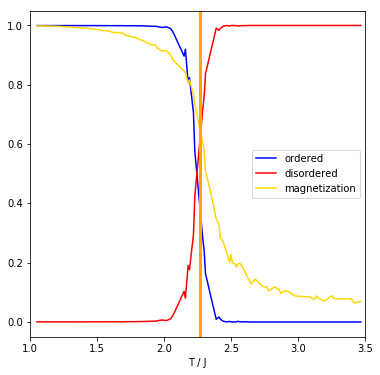

In [137]:
plt.plot(Temps, phase1, 'b', label='ordered')
plt.plot(Temps, phase2, 'r', label='disordered')
plt.plot(Temps, m, label='magnetization',c='gold')
plt.legend()
plt.xlim(1,3.5)
plt.axvline(2/np.log(1+np.sqrt(2)),lw=3,c='orange')
plt.xlabel('T / J')
plt.savefig('isingSupervised.pdf')
plt.show()